/tmp/ipykernel_1912215/587061457.py:58: RuntimeWarning: overflow encountered in power
  return (8 * math.pi * x ** 4) / (h ** 3 * c ** 3) * 1 / (np.e ** (x / (k_B * T)) - 1)
/tmp/ipykernel_1912215/587061457.py:58: RuntimeWarning: overflow encountered in multiply
  return (8 * math.pi * x ** 4) / (h ** 3 * c ** 3) * 1 / (np.e ** (x / (k_B * T)) - 1)
/tmp/ipykernel_1912215/587061457.py:58: RuntimeWarning: overflow encountered in true_divide
  return (8 * math.pi * x ** 4) / (h ** 3 * c ** 3) * 1 / (np.e ** (x / (k_B * T)) - 1)
/tmp/ipykernel_1912215/587061457.py:58: RuntimeWarning: invalid value encountered in true_divide
  return (8 * math.pi * x ** 4) / (h ** 3 * c ** 3) * 1 / (np.e ** (x / (k_B * T)) - 1)


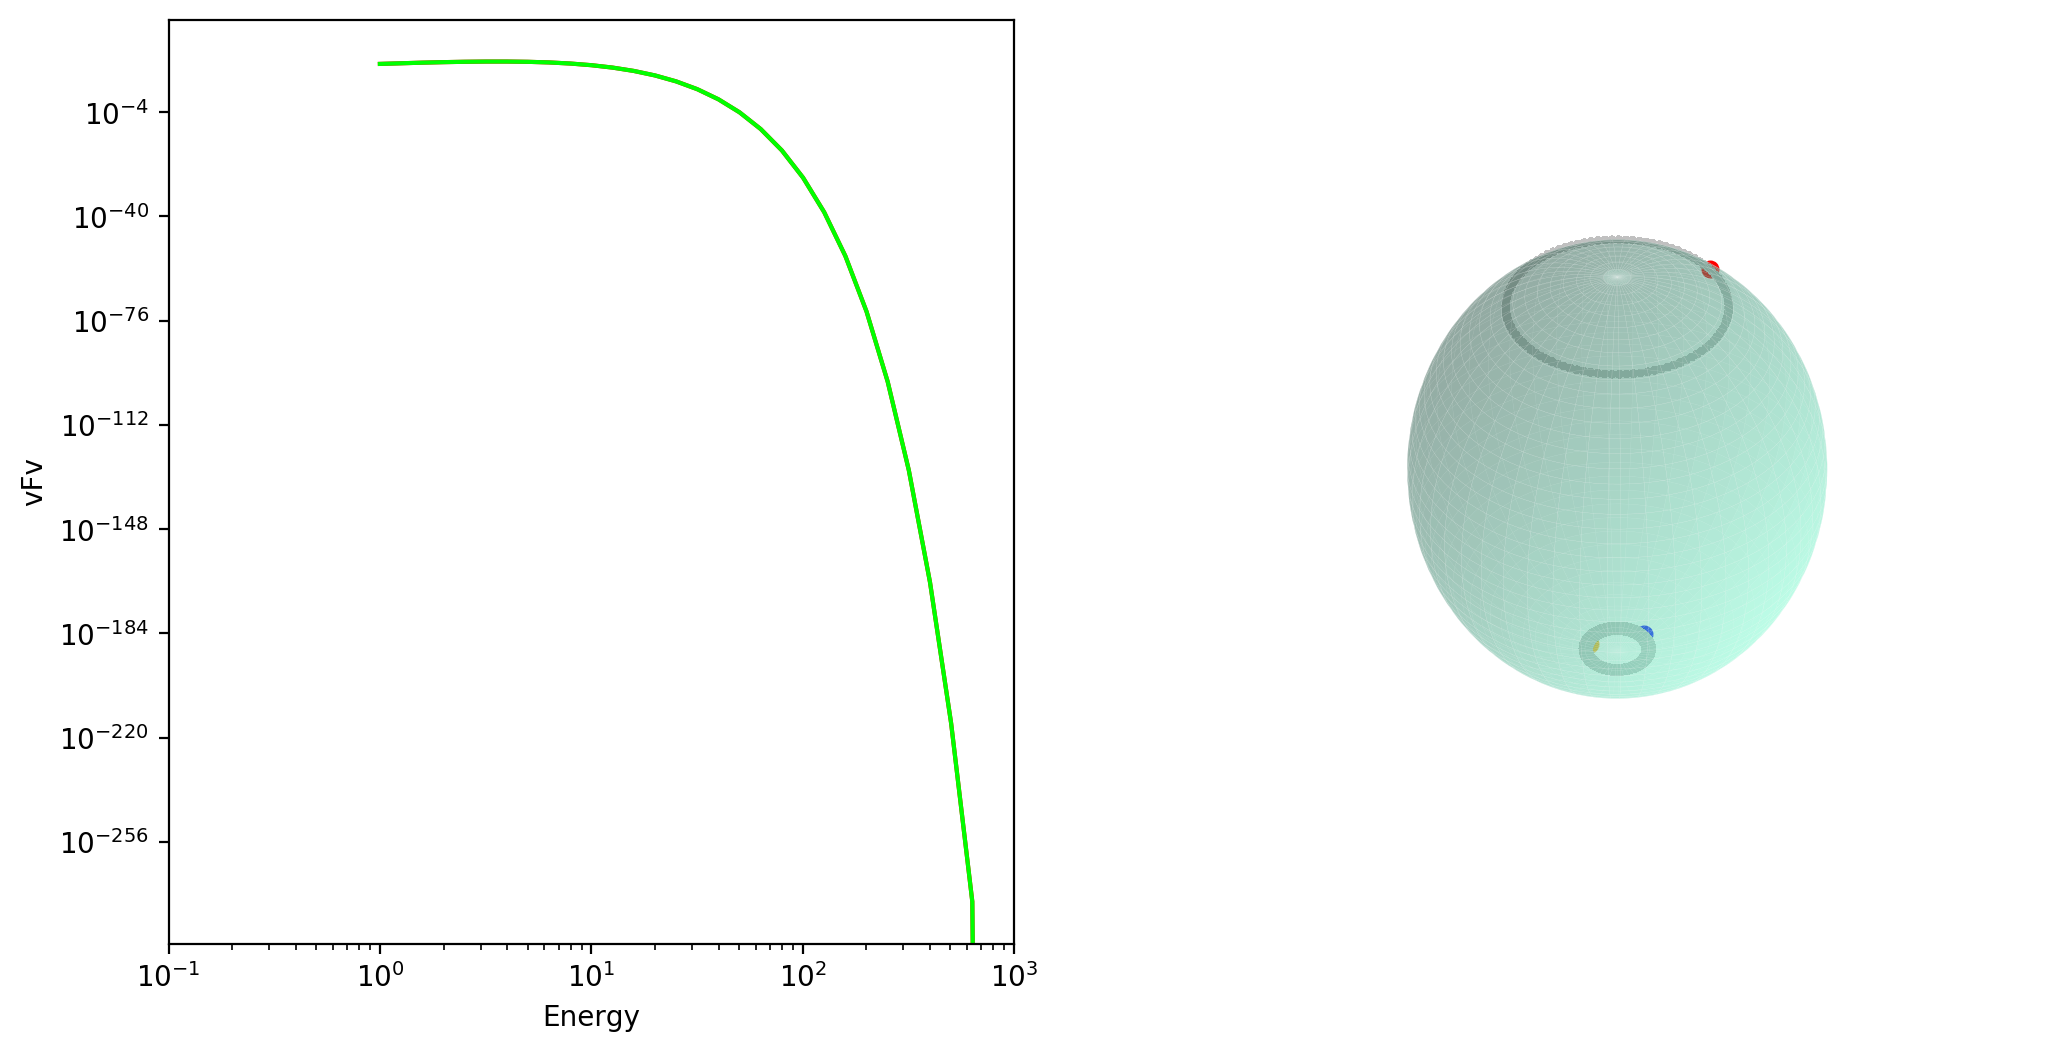

In [4]:
# %matplotlib qt
# spectrum, using SGR 0418+5729 fitting results

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
import numpy as np
import math
import scipy.optimize
import os
import matplotlib
from mpl_toolkits.mplot3d import axes3d, Axes3D

# physics constant
c = 3 * 10 ** 10
k_B = 8.617333262 * 10 ** (-5) # eV K-1, Boltzmann constant
h = 4.135667696 * 10 ** (-15) # eV⋅Hz−1, Planck constant

# geometric input
# inclination angle
i = np.radians(54.59229606284669)
# hot spot parameter
theta_1 = np.radians(170.30032148969232)
phi_1 = np.radians(128.15356622008315)
norm_1 = 6.462363930124616
theta_2 = np.radians(172.0399266405045)
phi_2 = np.radians(251.3109205065553)
norm_2 = 18.615967112346844
theta_3 = np.radians(31.2795000977478)
phi_3 = np.radians(122.16917843409833)
norm_3 = 1.2833967237907484

T_1 = norm_1 ** (1 / 4)
T_2 = norm_2 ** (1 / 4)
T_3 = norm_3 ** (1 / 4)
large_factor = 10000
T_1 = T_1 * large_factor
T_2 = T_2 * large_factor
T_3 = T_3 * large_factor

# constant parameter (eV units)
c = 2.998 * 10 ** 10
D_10 = 2 # D_10 = distance / 10kpc
R_magnetar = 10 ** 6
k_B = 8.617 * 10 ** (-5)
K = R_magnetar ** 2 / D_10 ** 2 # normalization factor

# planck distribution
# def spectrum(x, T):
#     return (2 * x ** 3) / ((np.e ** (x / (k_B * T)) - 1) * c ** 2 * h ** 2)

# planck distribution in X-ray era
# def spectrum(x, T):
#     return (K * 1.0344 * 10 ** (-3) * x ** 2) / (np.e ** (x / k_B / T) - 1)
# energy-vFv
def spectrum(x, T):
    return (8 * math.pi * x ** 4) / (h ** 3 * c ** 3) * 1 / (np.e ** (x / (k_B * T)) - 1)

E = np.logspace(0, 100, 1000)
# E = h * nu (old version)

x_geometry = np.linspace(0, 1, 360)

spec_HS1 = spectrum(E, T_1)
spec_HS2 = spectrum(E, T_2)
spec_HS3 = spectrum(E, T_3)

f_lb = 1. / 3.

def mu(x, i, theta, phi, norm):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * math.pi * x - phi) + np.cos(theta) * np.cos(i)
    F = norm * (y * (1. - f_lb) + f_lb)
    return F
def func(x, i, theta, phi, norm):
    return (abs(mu(x, i, theta, phi, norm)) + mu(x, i, theta, phi, norm)) / 2

HS1_geometry = func(x_geometry, i, theta_1, phi_1, norm_1)
HS2_geometry = func(x_geometry, i, theta_2, phi_2, norm_2)
HS3_geometry = func(x_geometry, i, theta_3, phi_3, norm_3)

fig = plt.figure(figsize = (12.0, 6.0), dpi = 200)
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2, projection = '3d')
# ax.plot(x_geometry, HS1_geometry, color = "blue")
# ax.plot(x_geometry, HS2_geometry, color = "orange")
# ax.plot(x_geometry, HS3_geometry, color = "red")
# plt.show()
# print(len(HS1_geometry))





# magnetar and its hot spots
r = 1.01
scale = 1
phi_sphere, theta_sphere = np.mgrid[0:np.pi:100j, 0:2 * np.pi:100j]
x = scale * r * np.sin(phi_sphere) * np.cos(theta_sphere)
y = scale * r * np.sin(phi_sphere) * np.sin(theta_sphere)
z = scale * r * np.cos(phi_sphere)

# trajectory of HS
x_track_hs_1 = scale * r * np.sin(theta_1) * np.cos(theta_sphere)
y_track_hs_1 = scale * r * np.sin(theta_1) * np.sin(theta_sphere)
z_track_hs_1 = scale * r * np.cos(theta_1)
x_track_hs_2 = scale * r * np.sin(theta_2) * np.cos(theta_sphere)
y_track_hs_2 = scale * r * np.sin(theta_2) * np.sin(theta_sphere)
z_track_hs_2 = scale * r * np.cos(theta_2)
x_track_hs_3 = scale * r * np.sin(theta_3) * np.cos(theta_sphere)
y_track_hs_3 = scale * r * np.sin(theta_3) * np.sin(theta_sphere)
z_track_hs_3 = scale * r * np.cos(theta_3)
# x_track_hs_4 = scale * r * np.sin(a_4) * np.cos(theta_sphere)
# y_track_hs_4 = scale * r * np.sin(a_4) * np.sin(theta_sphere)
# z_track_hs_4 = scale * r * np.cos(a_4)
# ax2.scatter(x_track_hs_4, y_track_hs_4, z_track_hs_4, s = 3, color = "silver")

# positions of HS
x_hs_1 = scale * r * np.sin(theta_1) * np.cos(phi_1)
x_hs_2 = scale * r * np.sin(theta_2) * np.cos(phi_2)
x_hs_3 = scale * r * np.sin(theta_3) * np.cos(phi_3)
# x_hs_4 = scale * r * np.sin(a_4) * np.cos(c_4)
y_hs_1 = scale * r * np.sin(theta_1) * np.sin(phi_1)
y_hs_2 = scale * r * np.sin(theta_2) * np.sin(phi_2)
y_hs_3 = scale * r * np.sin(theta_3) * np.sin(phi_3)
# y_hs_4 = scale * r * np.sin(a_4) * np.sin(c_4)
z_hs_1 = scale * r * np.cos(theta_1)
z_hs_2 = scale * r * np.cos(theta_2)
z_hs_3 = scale * r * np.cos(theta_3)
# z_hs_4 = scale * r * np.cos(a_4)

# x_hs = [x_hs_1, x_hs_2, x_hs_3, x_hs_4]
# y_hs = [y_hs_1, y_hs_2, y_hs_3, y_hs_4]
# z_hs = [z_hs_1, z_hs_2, z_hs_3, z_hs_4]
x_hs = [x_hs_1, x_hs_2, x_hs_3]
y_hs = [y_hs_1, y_hs_2, y_hs_3]
z_hs = [z_hs_1, z_hs_2, z_hs_3]






for j in range(0, len(x_geometry)):
    ax1.cla()
    ax2.cla()
    
    spec_HS1_obs = spec_HS1 * HS1_geometry[j]
    spec_HS2_obs = spec_HS2 * HS2_geometry[j]
    spec_HS3_obs = spec_HS3 * HS3_geometry[j]
    spec_total_obs = spec_HS1_obs + spec_HS2_obs + spec_HS3_obs
    ax1.plot(E, spec_HS1_obs, color = "blue")
    ax1.plot(E, spec_HS2_obs, color = "orange")
    ax1.plot(E, spec_HS3_obs, color = "red")
    ax1.plot(E, spec_total_obs, color = "lime")
#     ax1.set_ylim(0.000001, 0.001)
    ax1.set_xlim(0.1, 1000)
    ax1.set_xlabel("Energy")
    ax1.set_ylabel("vFv")
    ax1.set_xscale("log")
    ax1.set_yscale("log")
    
    phi_tmp = j
    
    ax2.plot_surface(x, y, z, alpha = 0.3, color = "aquamarine", edgecolor="w", linewidth = 0.1)
    ax2.scatter(x_track_hs_1, y_track_hs_1, z_track_hs_1, s = 3, color = "silver")
    ax2.scatter(x_track_hs_2, y_track_hs_2, z_track_hs_2, s = 3, color = "silver")
    ax2.scatter(x_track_hs_3, y_track_hs_3, z_track_hs_3, s = 3, color = "silver")
    ax2.scatter(x_hs[0], y_hs[0], z_hs[0], s = 30, c = "blue")
    ax2.scatter(x_hs[1], y_hs[1], z_hs[1], s = 30, c = "orange")
    ax2.scatter(x_hs[2], y_hs[2], z_hs[2], s = 30, c = "red")
    ax2.set_xlim(-1.1, 1.1)
    ax2.set_ylim(-1.1, 1.1)
    ax2.set_zlim(-1.1, 1.1)
    ax2.view_init(elev = 90 - np.degrees(i), azim = phi_tmp)
    ax2.axis("off")
    
    plt.savefig("image/" + str(j) + ".png")

In [ ]:
# magnetar with pulse profile

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
import numpy as np
import math
import scipy.optimize
import os

circle = patches.Circle(xy = (0, 0), radius = 5, fc = 'paleturquoise')

# i = pi / 4
tmp_obs = 5 / np.sqrt(2)
observer_part1 = patches.FancyArrow(0, 0, tmp_obs, tmp_obs, width = 0.01, head_width = 0.01, linestyle = 'dashed', color = 'dimgrey')
observer_part2 = patches.FancyArrow(tmp_obs, tmp_obs, 1 / np.sqrt(2), 1 / np.sqrt(2), width = 0.01, head_width = 0.1)

spin_axis_part1 = patches.FancyArrow(0, -6, 0, 1, width = 0.01, head_width =0.01)
spin_axis_part2 = patches.FancyArrow(0, -5, 0, 10, width = 0.01, head_width = 0.01, ls='dashed', color = 'dimgrey')
spin_axis_part3 = patches.FancyArrow(0, 5, 0, 1, width = 0.01, head_width = 0.1)

# theta = pi / 3
h = 2.5
a = 2.5 * np.sqrt(3)
b = 0.5
arc_1 = patches.Arc(xy = (0, h), width = 2 * a, height = 2 * b, angle = 0, theta1 = 180, theta2 =360)
arc_2 = patches.Arc(xy = (0, h), width = 2 * a, height = 2 * b, angle = 0, theta1 = 0, theta2 = 180, ls = 'dashed')
theta_line = patches.FancyArrow(0, 0, -a, h, width = 0.01, head_width = 0.01, ls='dashed', color = 'dimgrey')

# hot spot
phi = []
x_hot_spot = []
y_hot_spot = []
c = np.sqrt(a ** 2 - b ** 2)
for i in range(0, 90):
    tmp_phi = (-1) * np.radians(i)
    phi.append(tmp_phi)
    tmp_x_hot_spot = a * np.cos(tmp_phi)
    x_hot_spot.append(tmp_x_hot_spot)
    y_hot_spot.append((-1) * b * np.sqrt(a ** 2 -  tmp_x_hot_spot ** 2) / a + h)
tmp_phi = (-1) * np.radians(90)
phi.append(tmp_phi)
tmp_x_hot_spot = a * np.cos(tmp_phi)
x_hot_spot.append(tmp_x_hot_spot)
y_hot_spot.append((-1) * b * np.sqrt(a ** 2 -  tmp_x_hot_spot ** 2) / a + h)    
for i in range(91, 180):
    tmp_phi = (-1) * np.radians(i)
    phi.append(tmp_phi)
    tmp_x_hot_spot = (-1) * x_hot_spot[179 - i]
    x_hot_spot.append(tmp_x_hot_spot)
    y_hot_spot.append(y_hot_spot[179 - i])
for i in range(180, 270):
    tmp_phi = (-1) * np.radians(i)
    phi.append(tmp_phi)
    tmp_x_hot_spot = (-1) * x_hot_spot[i - 180]
    x_hot_spot.append(tmp_x_hot_spot)
    y_hot_spot.append(2 * h - y_hot_spot[i - 180])
for i in range(270, 360):
    tmp_phi = (-1) * np.radians(i)
    phi.append(tmp_phi)
    tmp_x_hot_spot = x_hot_spot[360 - i]
    x_hot_spot.append(tmp_x_hot_spot)
    y_hot_spot.append(2 * h - y_hot_spot[360 - i])
    
for i in range(360, 720):
    if i < 450:
        tmp_phi = (-1) * np.radians(i)
        phi.append(tmp_phi)
        tmp_x_hot_spot = a * np.cos(tmp_phi)
        x_hot_spot.append(tmp_x_hot_spot)
        y_hot_spot.append((-1) * b * np.sqrt(a ** 2 -  tmp_x_hot_spot ** 2) / a + h)
    elif i == 450:
        tmp_phi = (-1) * np.radians(90)
        phi.append(tmp_phi)
        tmp_x_hot_spot = a * np.cos(tmp_phi)
        x_hot_spot.append(tmp_x_hot_spot)
        y_hot_spot.append((-1) * b * np.sqrt(a ** 2 -  tmp_x_hot_spot ** 2) / a + h)
    elif i < 540:
        tmp_phi = (-1) * np.radians(i)
        phi.append(tmp_phi)
        tmp_x_hot_spot = (-1) * x_hot_spot[539 - i]
        x_hot_spot.append(tmp_x_hot_spot)
        y_hot_spot.append(y_hot_spot[539 - i])
    elif i < 630:
        tmp_phi = (-1) * np.radians(i)
        phi.append(tmp_phi)
        tmp_x_hot_spot = (-1) * x_hot_spot[i - 540]
        x_hot_spot.append(tmp_x_hot_spot)
        y_hot_spot.append(2 * h - y_hot_spot[i - 540])
    else:
        tmp_phi = (-1) * np.radians(i)
        phi.append(tmp_phi)
        tmp_x_hot_spot = x_hot_spot[720 - i]
        x_hot_spot.append(tmp_x_hot_spot)
        y_hot_spot.append(2 * h - y_hot_spot[720 - i])

# pulse profile
# light bending
def mu(x, theta, i, phi, m):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * math.pi * x - phi) + np.cos(theta) * np.cos(i)
    F = m * (y * (1. - 1. / 3.) + 1. / 3.)
    return F
# pure Newton
def mu_n(x, theta, i, phi, m):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * math.pi * x - phi) + np.cos(theta) * np.cos(i)
    F = m * (y * (1. - 0.) + 0.)
    return F

# a as theta, b as i, c as phi, d as Intensity(amplitude)
def func(x, a, b, c, d):
    return (mu(x, a, b, c, d) + abs(mu(x, a, b, c, d))) / 2
def func_n(x, a, b, c, d):
    return (mu_n(x, a, b, c, d) + abs(mu_n(x, a, b, c, d))) / 2

#parameter_initial = np.array([0.98, 0.8, 0.01, 0.32])
# d_a = 0.08726646
# a=[]
# for i in range(0, 31):
#     print(i)
#     a.append(i * d_a) 
# print(a[0])
# b = 0.524
# c = 0
# d = 0.3

a_p = math.pi / 3
b_p = math.pi / 4
c_p = 0
d_p = 0.3

x = np.linspace(-0.5, 2.5, 10000)

y_fit = func(x, a_p, b_p, c_p, d_p)
y_fit_n = func_n(x, a_p, b_p, c_p, d_p)

print("For pulse profile: r_g = 3, theta_1 = ", a_p, ", i = ", b_p, ", amp = ", d_p)

dx_p = 1 / 360
x_p = 0

# ax.scatter(x_hot_spot, y_hot_spot, zorder = 10, s = 10, color = 'gold')
# ax.add_patch(circle)
# ax.add_patch(observer_part1)
# ax.add_patch(observer_part2)
# ax.add_patch(spin_axis_part1)
# ax.add_patch(spin_axis_part2)
# ax.add_patch(spin_axis_part3)
# ax.add_patch(arc_1)
# ax.add_patch(arc_2)
# ax.add_patch(theta_line)

#print(phi)
#print(x_hot_spot)


fig = plt.figure(figsize=(10, 5), dpi = 200)
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

for j in range(0, 720):
    # clean figure
    ax1.cla()
    ax2.cla()
    
    # magnetar
    ax2.scatter(x_hot_spot[j], y_hot_spot[j], zorder = 10, s = 10, color = "crimson")
    ax2.add_patch(circle)
    ax2.add_patch(observer_part1)
    ax2.add_patch(observer_part2)
    ax2.add_patch(spin_axis_part1)
    ax2.add_patch(spin_axis_part2)
    ax2.add_patch(spin_axis_part3)
    ax2.add_patch(arc_1)
    ax2.add_patch(arc_2)
    ax2.add_patch(theta_line)
    ax2.axis('scaled')
    ax2.axis('off')
    ax2.text(-6, 6, r"$i = 45°$")
    ax2.text(-6, 5, r"$\theta = 60°$")
    ax2.text(0.35, 0.7, r"$i$")
    ax2.text(-0.6, 0.7, r"$\theta$")
    ax2.text(5, 4.5, "observer")
    ax2.text(-1.5, 6.5, "rotation axis")
#     ax2.text(-6, -6, "light bending込み", fontname = "MS Gothic")
    ax2.plot()
    
    # pulse profile
    ax1.set_xlim(0, 2)
    ax1.set_ylim(-0.01, 0.35)
    ax1.plot(x, y_fit, label= "Light bending")
    ax1.plot(x, y_fit_n, label = "Pure Newton")
    ax1.legend()
    ax1.set_xlabel('Phase')
    ax1.set_ylabel('Counts/sec')
    ax1.scatter(x_p, func(x_p, a_p, b_p, c_p, d_p), zorder = 10, s = 10, color = "crimson")
    ax1.scatter(x_p, func_n(x_p, a_p, b_p, c_p, d_p), zorder = 10, s = 10, color = "crimson")
    x_p += dx_p
    
    plt.savefig("image1/" + str(j) + ".png")


2.0


In [ ]:
# magnetar with limited size hot spot

# magnetar with pulse profile

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
import numpy as np
import math
import scipy.optimize
import os

circle = patches.Circle(xy = (0, 0), radius = 5, fc = 'paleturquoise')

# i = pi / 4
tmp_obs = 5 / np.sqrt(2)
observer_part1 = patches.FancyArrow(0, 0, tmp_obs, tmp_obs, width = 0.01, head_width = 0.01, linestyle = 'dashed', color = 'dimgrey')
observer_part2 = patches.FancyArrow(tmp_obs, tmp_obs, 1 / np.sqrt(2), 1 / np.sqrt(2), width = 0.01, head_width = 0.1)

spin_axis_part1 = patches.FancyArrow(0, -6, 0, 1, width = 0.01, head_width =0.01)
spin_axis_part2 = patches.FancyArrow(0, -5, 0, 10, width = 0.01, head_width = 0.01, ls='dashed', color = 'dimgrey')
spin_axis_part3 = patches.FancyArrow(0, 5, 0, 1, width = 0.01, head_width = 0.1)

# theta = pi / 3
h = 2.5
a = 2.5 * np.sqrt(3)
b = 0.5
arc_1 = patches.Arc(xy = (0, h), width = 2 * a, height = 2 * b, angle = 0, theta1 = 180, theta2 =360)
arc_2 = patches.Arc(xy = (0, h), width = 2 * a, height = 2 * b, angle = 0, theta1 = 0, theta2 = 180, ls = 'dashed')
theta_line = patches.FancyArrow(0, 0, -a, h, width = 0.01, head_width = 0.01, ls='dashed', color = 'dimgrey')

# hot spot
phi = []
x_hot_spot = []
y_hot_spot = []
c = np.sqrt(a ** 2 - b ** 2)
for i in range(0, 90):
    tmp_phi = (-1) * np.radians(i)
    phi.append(tmp_phi)
    tmp_x_hot_spot = a * np.cos(tmp_phi)
    x_hot_spot.append(tmp_x_hot_spot)
    y_hot_spot.append((-1) * b * np.sqrt(a ** 2 -  tmp_x_hot_spot ** 2) / a + h)
tmp_phi = (-1) * np.radians(90)
phi.append(tmp_phi)
tmp_x_hot_spot = a * np.cos(tmp_phi)
x_hot_spot.append(tmp_x_hot_spot)
y_hot_spot.append((-1) * b * np.sqrt(a ** 2 -  tmp_x_hot_spot ** 2) / a + h)    
for i in range(91, 180):
    tmp_phi = (-1) * np.radians(i)
    phi.append(tmp_phi)
    tmp_x_hot_spot = (-1) * x_hot_spot[179 - i]
    x_hot_spot.append(tmp_x_hot_spot)
    y_hot_spot.append(y_hot_spot[179 - i])
for i in range(180, 270):
    tmp_phi = (-1) * np.radians(i)
    phi.append(tmp_phi)
    tmp_x_hot_spot = (-1) * x_hot_spot[i - 180]
    x_hot_spot.append(tmp_x_hot_spot)
    y_hot_spot.append(2 * h - y_hot_spot[i - 180])
for i in range(270, 360):
    tmp_phi = (-1) * np.radians(i)
    phi.append(tmp_phi)
    tmp_x_hot_spot = x_hot_spot[360 - i]
    x_hot_spot.append(tmp_x_hot_spot)
    y_hot_spot.append(2 * h - y_hot_spot[360 - i])
    
for i in range(360, 720):
    if i < 450:
        tmp_phi = (-1) * np.radians(i)
        phi.append(tmp_phi)
        tmp_x_hot_spot = a * np.cos(tmp_phi)
        x_hot_spot.append(tmp_x_hot_spot)
        y_hot_spot.append((-1) * b * np.sqrt(a ** 2 -  tmp_x_hot_spot ** 2) / a + h)
    elif i == 450:
        tmp_phi = (-1) * np.radians(90)
        phi.append(tmp_phi)
        tmp_x_hot_spot = a * np.cos(tmp_phi)
        x_hot_spot.append(tmp_x_hot_spot)
        y_hot_spot.append((-1) * b * np.sqrt(a ** 2 -  tmp_x_hot_spot ** 2) / a + h)
    elif i < 540:
        tmp_phi = (-1) * np.radians(i)
        phi.append(tmp_phi)
        tmp_x_hot_spot = (-1) * x_hot_spot[539 - i]
        x_hot_spot.append(tmp_x_hot_spot)
        y_hot_spot.append(y_hot_spot[539 - i])
    elif i < 630:
        tmp_phi = (-1) * np.radians(i)
        phi.append(tmp_phi)
        tmp_x_hot_spot = (-1) * x_hot_spot[i - 540]
        x_hot_spot.append(tmp_x_hot_spot)
        y_hot_spot.append(2 * h - y_hot_spot[i - 540])
    else:
        tmp_phi = (-1) * np.radians(i)
        phi.append(tmp_phi)
        tmp_x_hot_spot = x_hot_spot[720 - i]
        x_hot_spot.append(tmp_x_hot_spot)
        y_hot_spot.append(2 * h - y_hot_spot[720 - i])

# pulse profile
# light bending
def mu(x, theta, i, phi, m):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * math.pi * x - phi) + np.cos(theta) * np.cos(i)
    F = m * (y * (1. - 1. / 3.) + 1. / 3.)
    return F
# pure Newton
def mu_n(x, theta, i, phi, m):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * math.pi * x - phi) + np.cos(theta) * np.cos(i)
    F = m * (y * (1. - 0.) + 0.)
    return F

# a as theta, b as i, c as phi, d as Intensity(amplitude)
def func(x, a, b, c, d):
    return (mu(x, a, b, c, d) + abs(mu(x, a, b, c, d))) / 2
def func_n(x, a, b, c, d):
    return (mu_n(x, a, b, c, d) + abs(mu_n(x, a, b, c, d))) / 2

# a_p = math.pi / 3
# b_p = math.pi / 4
# c_p = 0
# d_p = 0.3

x = np.linspace(-0.5, 2.5, 10000)

y_fit = func(x, a_p, b_p, c_p, d_p)
y_fit_n = func_n(x, a_p, b_p, c_p, d_p)

print("For pulse profile: r_g = 3, theta_1 = ", a_p, ", i = ", b_p, ", amp = ", d_p)

dx_p = 1 / 360
x_p = 0

# ax.scatter(x_hot_spot, y_hot_spot, zorder = 10, s = 10, color = 'gold')
# ax.add_patch(circle)
# ax.add_patch(observer_part1)
# ax.add_patch(observer_part2)
# ax.add_patch(spin_axis_part1)
# ax.add_patch(spin_axis_part2)
# ax.add_patch(spin_axis_part3)
# ax.add_patch(arc_1)
# ax.add_patch(arc_2)
# ax.add_patch(theta_line)

#print(phi)
#print(x_hot_spot)


fig = plt.figure(figsize=(10, 5), dpi = 200)
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

for j in range(0, 720):
    # clean figure
    ax1.cla()
    ax2.cla()
    
    # magnetar
    ax2.scatter(x_hot_spot[j], y_hot_spot[j], zorder = 10, s = 10, color = "crimson")
    ax2.add_patch(circle)
    ax2.add_patch(observer_part1)
    ax2.add_patch(observer_part2)
    ax2.add_patch(spin_axis_part1)
    ax2.add_patch(spin_axis_part2)
    ax2.add_patch(spin_axis_part3)
    ax2.add_patch(arc_1)
    ax2.add_patch(arc_2)
    ax2.add_patch(theta_line)
    ax2.axis('scaled')
    ax2.axis('off')
    ax2.text(-6, 6, r"$i = 45°$")
    ax2.text(-6, 5, r"$\theta = 60°$")
    ax2.text(0.35, 0.7, r"$i$")
    ax2.text(-0.6, 0.7, r"$\theta$")
    ax2.text(5, 4.5, "observer")
    ax2.text(-1.5, 6.5, "rotation axis")
#     ax2.text(-6, -6, "light bending込み", fontname = "MS Gothic")
    ax2.plot()
    
    # pulse profile
    ax1.set_xlim(0, 2)
    ax1.set_ylim(-0.01, 0.35)
    ax1.plot(x, y_fit, label= "Light bending")
    ax1.plot(x, y_fit_n, label = "Pure Newton")
    ax1.legend()
    ax1.set_xlabel('Phase')
    ax1.set_ylabel('Counts/sec')
    ax1.scatter(x_p, func(x_p, a_p, b_p, c_p, d_p), zorder = 10, s = 10, color = "crimson")
    ax1.scatter(x_p, func_n(x_p, a_p, b_p, c_p, d_p), zorder = 10, s = 10, color = "crimson")
    x_p += dx_p
    
    plt.savefig("image1/" + str(j) + ".png")


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import xspec

def tbabs_model(energy, nH):
    xspec.AllModels.clear()
    model = xspec.Model("tbabs*pow")
    
    model.TBabs.nH = nH
    
    energy_bins = np.vstack((energy[:-1], energy[1:])).T
    xspec_energy = xspec.(energy_bins[:, 0], energy_bins[:, 1])
    
    model.setPars()
    flux = model.evalFlux(xspec_energy)
    
    return flux

# Example usage
energy = np.logspace(0, 2, 1000)
nH = 1.0
flux = tbabs_model(energy, nH)


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/Off
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________



AttributeError: module 'xspec' has no attribute 'XSadd'

In [6]:
import xspec
print(xspec.Model.showList())

None
 Additive Models: 
agauss      c6vmekl     eqpair      nei         rnei        vraymond    
agnsed      carbatm     eqtherm     nlapec      sedov       vrnei       
agnslim     cemekl      equil       npshock     sirf        vsedov      
apec        cevmkl      expdec      nsa         slimbh      vtapec      
bapec       cflow       ezdiskbb    nsagrav     smaug       vvapec      
bbody       compLS      gadem       nsatmos     snapec      vvgnei      
bbodyrad    compPS      gaussian    nsmax       srcut       vvnei       
bexrav      compST      gnei        nsmaxg      sresc       vvnpshock   
bexriv      compTT      grad        nsx         ssa         vvpshock    
bkn2pow     compbb      grbcomp     nteea       step        vvrnei      
bknpower    compmag     grbjet      nthComp     tapec       vvsedov     
bmc         comptb      grbm        optxagn     vapec       vvtapec     
bremss      compth      hatm        optxagnf    vbremss     vvwdem      
brnei       cph         jet

In [11]:
import numpy as np
import xspec

def tbabs_model(energy, nH):
    xspec.AllModels.clear()
    model = xspec.Model("TBabs*pow")
    
    model.TBabs.nH = nH
    
    energy_bins = np.vstack((energy[:-1], energy[1:])).T
    xspec_energy = energy_bins
    
    model.setPars()
    flux = model.values(xspec_energy)
    
    return flux

# Example usage
energy = np.logspace(0, 2, 1000)
nH = 1.0
flux = tbabs_model(energy, nH)


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/Off
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________



Exception: Error: Argument must be a spectrum number (int).

In [15]:
import numpy as np
import xspec

def tbabs_model(energy, nH):
    xspec.AllModels.clear()
    model = xspec.Model("TBabs*pow")
    
    model.TBabs.nH = nH
    
    energy_bins = np.vstack((energy[:-1], energy[1:])).T
    xspec_energy = xspec.Array(energy_bins)
    
    model.setPars()
    
    # Create a dummy spectrum to use for flux calculation
    xspec.AllData.clear()
    xspec.AllData += xspec.Spectrum('dummy_spec', xspec_energy[:, 0], xspec_energy[:, 1])
    
    flux = model.flux
    
    return flux[0]

# Example usage
energy = np.logspace(0, 2, 1000)
nH = 1.0
flux = tbabs_model(energy, nH)

No such file: .pha

Model TBabs<1>*powerlaw<2> Source No.: 1   Active/Off
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________



AttributeError: module 'xspec' has no attribute 'Array'

In [18]:
import numpy as np
import xspec

def tbabs_model(energy, nH):
    xspec.AllModels.clear()
    model = xspec.Model("TBabs*pow")
    
    model.TBabs.nH = nH
    
    energy_bins = np.vstack((energy[:-1], energy[1:])).T
    xspec_energy = list(energy_bins.flatten())
    
    model.setPars()
    flux = model.evalFlux(xspec_energy)
    
    return flux

# Example usage
energy = np.logspace(0, 2, 1000)
nH = 1.0
flux = tbabs_model(energy, nH)


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/Off
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________



AttributeError: 'Model' object has no attribute 'evalFlux'

In [35]:
import numpy as np
import xspec

def tbabs_model(energy, nH):
    xspec.AllModels.clear()
    model = xspec.Model("TBabs*pow")
    
    model.TBabs.nH = nH
    
    energy_bins = np.vstack((energy[:-1], energy[1:])).T
#     xspec_energy = xspec.Model.energies(energy_bins.flatten())
    xspec_energy = np.array(energy_bins.flatten())
    
    model.setPars()
    flux = model.flux(xspec_energy)
    
    return flux

# Example usage
energy = np.logspace(0, 2, 1000)
nH = 1.0
flux = tbabs_model(energy, nH)


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/Off
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________



TypeError: 'tuple' object is not callable

In [36]:
import warnings

warnings.simplefilter("ignore")
import numpy as np

np.seterr(all="ignore")

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [37]:
import matplotlib.pyplot as plt

In [42]:
%%capture
from threeML import set_threeML_style
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)


set_threeML_style()

In [43]:
from astromodels.xspec.factory import *

Loading xspec models...Generating code for Xspec model agauss...
Generating code for Xspec model agnsed...
Generating code for Xspec model agnslim...
Generating code for Xspec model apec...
Generating code for Xspec model bapec...
Generating code for Xspec model btapec...
Generating code for Xspec model bbody...
Generating code for Xspec model bbodyrad...
Generating code for Xspec model bexrav...
Generating code for Xspec model bexriv...
Generating code for Xspec model bknpower...
Generating code for Xspec model bkn2pow...
Generating code for Xspec model bmc...
Generating code for Xspec model bremss...
Generating code for Xspec model brnei...
Generating code for Xspec model bvapec...
Generating code for Xspec model bvrnei...
Generating code for Xspec model bvtapec...
Generating code for Xspec model bvvapec...
Generating code for Xspec model bvvrnei...
Generating code for Xspec model bvvtapec...
Generating code for Xspec model c6mekl...
Generating code for Xspec model c6pmekl...
Generat

Generating code for Xspec model zwabs...
Generating code for Xspec model zwndabs...
done


Text(0, 0.5, 'flux')

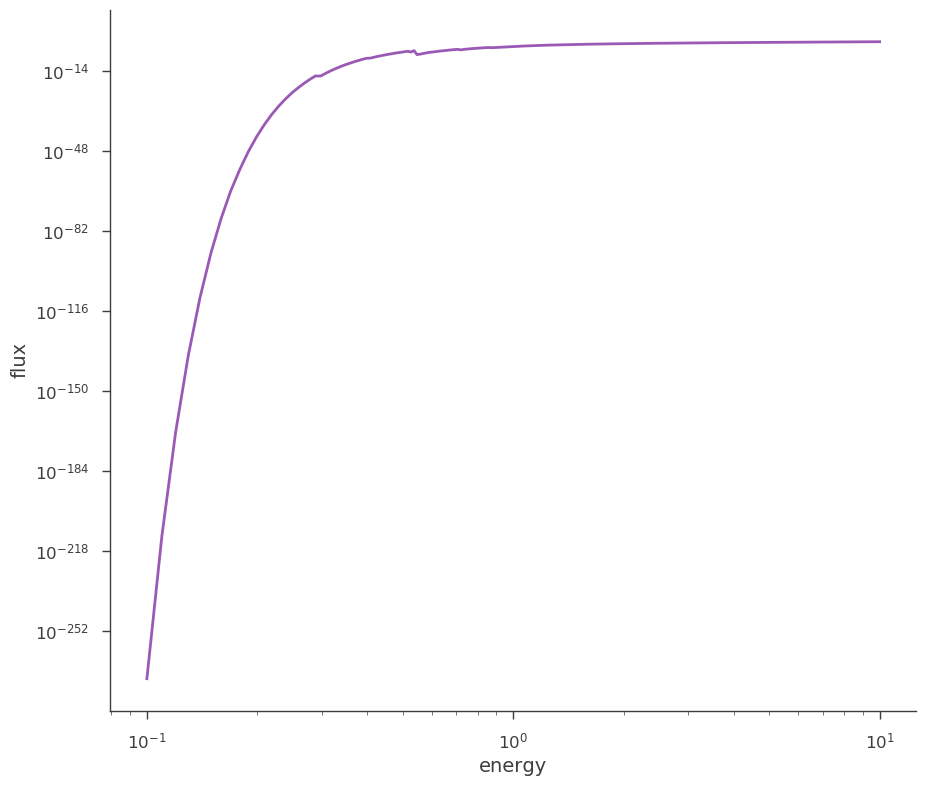

In [48]:
# from astromodels import Powerlaw

# plaw = XS_powerlaw()
# phabs = XS_phabs()
# phabs


# am_plaw = Powerlaw()

# plaw_with_abs = am_plaw * phabs


# fig, ax = plt.subplots()

# energy_grid = np.linspace(0.1, 10.0, 1000)

# ax.loglog(energy_grid, plaw_with_abs(energy_grid))
# ax.set_xlabel("energy")
# ax.set_ylabel("flux")

from astromodels import Blackbody

bbody = XS_bbody()
tbabs = XS_TBabs()
tbabs


am_bbody = Blackbody()

bbody_with_abs = am_bbody * tbabs


fig, ax = plt.subplots()

energy_grid = np.linspace(0.1, 10.0, 1000)

ax.loglog(energy_grid, bbody_with_abs(energy_grid))
ax.set_xlabel("energy")
ax.set_ylabel("flux")